## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_raw = mouse_metadata.merge(study_results, how='left', on='Mouse ID')
mouse_metadata_raw.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
print(f"{len(mouse_metadata_raw['Mouse ID'].unique())} mice were in the test case\n")

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f"total tests\n{'--'*20}\n{mouse_metadata_raw['Mouse ID'].count()}\n")

# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = mouse_metadata_raw.loc[mouse_metadata_raw.duplicated() == True][['Mouse ID','Drug Regimen','Sex','Age_months']]
print(f"Found a duplicate test\n{'--'*20}\n{dupe_mouse}\n")

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_metadata_clean_df = mouse_metadata_raw.drop_duplicates().reset_index()
mouse_metadata_clean_df = mouse_metadata_raw.loc[mouse_metadata_raw['Mouse ID'] != 'g989'].reset_index()
#mouse_metadata_clean_df = mouse_metadata_clean_df
# Checking the number of mice in the clean DataFrame.
print(f"Corrected total number of tests\n{'--'*20}\n{mouse_metadata_clean_df['Mouse ID'].count()}\n")


249 mice were in the test case

total tests
----------------------------------------
1893

Found a duplicate test
----------------------------------------
    Mouse ID Drug Regimen     Sex  Age_months
909     g989     Propriva  Female          21

Corrected total number of tests
----------------------------------------
1880



## Summary Statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regime_group = mouse_metadata_clean_df.groupby(['Drug Regimen'])
tumor_mean = regime_group.mean()['Tumor Volume (mm3)']
tumor_median = regime_group.median()['Tumor Volume (mm3)']
tumor_variance = regime_group.var()['Tumor Volume (mm3)']
tumor_sd = regime_group.std()['Tumor Volume (mm3)']
tumor_sem = regime_group.sem()['Tumor Volume (mm3)']


regimen_summary_df = pd.DataFrame()

regimens = mouse_metadata_clean_df['Drug Regimen'].unique()#['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites']

regimen_summary_df = pd.DataFrame({'Toumor mean' : tumor_mean,
                                   'tumor_median' : tumor_median,
                                   'Tumor Variance' : tumor_variance,
                                   'Tumor SD' : tumor_sd,
                                   'Tumor SEM' : tumor_sem
                                  })

regimen_summary_df

,Toumor mean,tumor_median,Tumor Variance,Tumor SD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [4]:
regimen_summary_df.head(2)


,Toumor mean,tumor_median,Tumor Variance,Tumor SD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


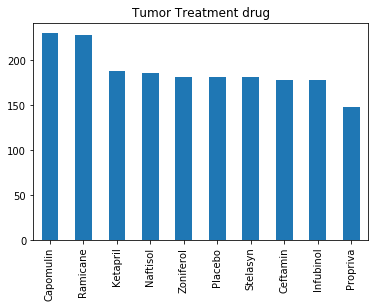

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
plt.figure()
mouse_metadata_clean_df['Drug Regimen'].value_counts().plot(kind='bar', title='Tumor Treatment drug')
#.plot.bar(x=0,y='Tumor Volume (mm3)')

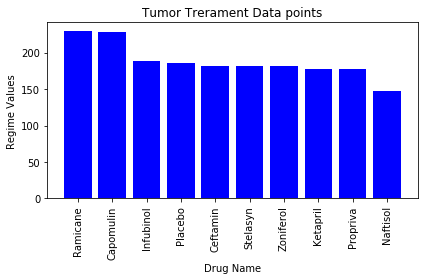

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

regime_counts = mouse_metadata_clean_df['Drug Regimen'].value_counts()
drug_names = mouse_metadata_clean_df['Drug Regimen'].unique()
plt.figure()
plt.bar(drug_names, regime_counts, color="blue")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Name")
plt.ylabel("Regime Values")
plt.title("Tumor Trerament Data points")
plt.tight_layout()
plt.show()


## Pie Plots


gender_df for pie 1
----------------------------------------
   Male Mice  Female Mice
0        125          123

sex_df for pie 2
----------------------------------------
             count
Male Mice      125
Female Mice    123


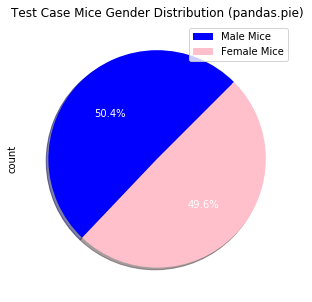

In [7]:
mice_gen_gp = mouse_metadata_clean_df[['Sex','Mouse ID']].groupby('Mouse ID')#[[,'Sex']]
gender_df = pd.DataFrame([{'Male Mice':0,'Female Mice':0}])
sex_df = pd.DataFrame({'count' : [0,0]},index=['Male Mice','Female Mice'])

for mouse, group in mice_gen_gp:
    mouse_id = ''
    for row_index, row in group.iterrows():
        if mouse_id == mouse: continue
        if row['Sex'] == 'Female':
            gender_df['Female Mice'] += 1
        else:
            gender_df['Male Mice'] += 1
        mouse_id = mouse
        
sex_df['count'][0] = gender_df['Male Mice']
sex_df['count'][1] = gender_df['Female Mice']     
gender=list(gender_df.columns)       
print(f"\ngender_df for pie 1\n{'--'*20}\n{gender_df}")
print(f"\nsex_df for pie 2\n{'--'*20}\n{sex_df}")

colors=["blue", "pink"]

mouseplot = sex_df.plot.pie(y='count', figsize=(5, 5), colors=colors, autopct='%1.1f%%', textprops=dict(color="w"), shadow=True, startangle=45)

#mouseplot.legend(wedges, ingredients, title="Ingredients", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
mouseplot.set_title("Test Case Mice Gender Distribution (pandas.pie)")

plt.show()

C:\Users\SeaLord\anaconda37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


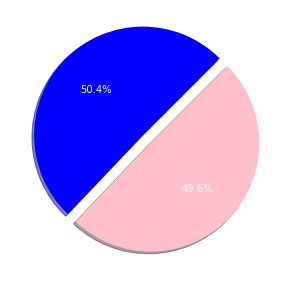

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
plt.pie(gender_df, explode=(0.1,0), colors=colors, textprops=dict(color="w"), labels=gender, autopct='%1.1f%%', shadow=True, startangle=45)
plt.set_title=("Test Case Mice Gender Distribution (pyplot)")
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 



drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

four_drugs_df = mouse_metadata_clean_df.loc[(mouse_metadata_clean_df['Drug Regimen'] == 'Capomulin')|
                                           (mouse_metadata_clean_df['Drug Regimen'] == 'Ramicane')|
                                           (mouse_metadata_clean_df['Drug Regimen'] == 'Infubinol')|
                                           (mouse_metadata_clean_df['Drug Regimen'] == 'Ceftamin')]

four_drugs_df.reset_index()
best_treatment_df = four_drugs_df.groupby(['Mouse ID']).nth(-1)
best_treatment_df.sort_values(by=['Mouse ID'])
count = 0
treatment = []
for drug in drug_list:
    treatment.append({drug : best_treatment_df[best_treatment_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']})
    # Quartile calculations: Capomulin
    print(f"Quartiles for {drug}\n{'--'*20}\n")
    quartiles = treatment[count][drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\tLower quartile of {drug} tumor volume\n\t{'--'*20}\n\t\t{lowerq}")
    print(f"\tUpper quartile of {drug} tumor volume\n\t{'--'*20}\n\t\t{upperq}")
    print(f"\tInterquartile range of {drug} tumor volume\n\t{'--'*20}\n\t\t{iqr}")
    print(f"\tMedian of {drug} tumor volume\n\t{'--'*20}\n\t{quartiles[0.5]}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"\tTumor volume Lower Bounds\n\t{'--'*20}\n\t\t{lower_bound}")
    print(f"\tTumor volume Upper Bounds\n\t{'--'*20}\n\t\t{upper_bound}")
    count += 1
# Quartile calculations: Ramicane
#quartiles = treatment2.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq
#print(f"\nLower quartile of Ramicane tumor volume\n{'--'*20}\n\t{lowerq}")
#print(f"\nUpper quartile of Ramicane tumor volume\n{'--'*20}\n\t{upperq}")
#print(f"\nInterquartile range of Ramicane tumor volume\n{'--'*20}\n\t{iqr}")
#print(f"\nMedian of Ramicane tumor volume\n{'--'*20}\n\t{quartiles[0.5]} ")
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"\nRamicane Tumor volume Lower Bounds\n{'--'*20}\n\t{lower_bound}")

#print(f"\nRamicane Tumor volume Upper Bounds\n{'--'*20}\n\t{upper_bound}")

Quartiles for Capomulin
----------------------------------------

	Lower quartile of Capomulin tumor volume
	----------------------------------------
		32.37735684
	Upper quartile of Capomulin tumor volume
	----------------------------------------
		40.1592203
	Interquartile range of Capomulin tumor volume
	----------------------------------------
		7.781863460000004
	Median of Capomulin tumor volume
	----------------------------------------
	38.125164399999996
	Tumor volume Lower Bounds
	----------------------------------------
		20.70456164999999
	Tumor volume Upper Bounds
	----------------------------------------
		51.83201549
Quartiles for Ramicane
----------------------------------------

	Lower quartile of Ramicane tumor volume
	----------------------------------------
		31.56046955
	Upper quartile of Ramicane tumor volume
	----------------------------------------
		40.65900627
	Interquartile range of Ramicane tumor volume
	----------------------------------------
		9.09853671999

<Figure size 432x288 with 0 Axes>

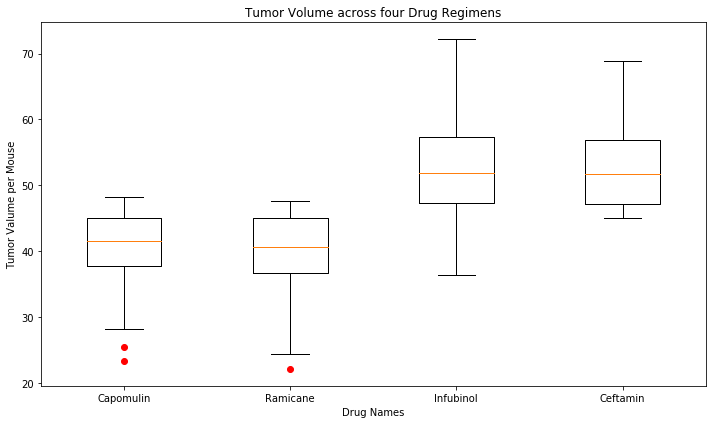

In [27]:
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

treatment1 = four_drugs_df['Tumor Volume (mm3)'].loc[four_drugs_df['Drug Regimen'] == 'Capomulin']#.reset_index(drop=True, inplace=True)
treatment2 = four_drugs_df['Tumor Volume (mm3)'].loc[four_drugs_df['Drug Regimen'] == 'Ramicane']#.reset_index(drop=True, inplace=True)
treatment3 = four_drugs_df['Tumor Volume (mm3)'].loc[four_drugs_df['Drug Regimen'] == 'Infubinol']#.reset_index(drop=True, inplace=True)
treatment4 = four_drugs_df['Tumor Volume (mm3)'].loc[four_drugs_df['Drug Regimen'] == 'Ceftamin']#.reset_index(drop=True, inplace=True)
#

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure()
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot([treatment1.values.flatten(), treatment2.values.flatten(), treatment3.values.flatten(), treatment4.values.flatten()], labels=drug_list, sym='ro')
plt.xlabel('Drug Names')
plt.ylabel('Tumor Valume per Mouse')
plt.title('Tumor Volume across four Drug Regimens')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

      Tumor Volume (mm3)  Timepoint
1439           45.000000          0
1440           45.597064          5
1441           46.059608         10
1442           46.539206         15


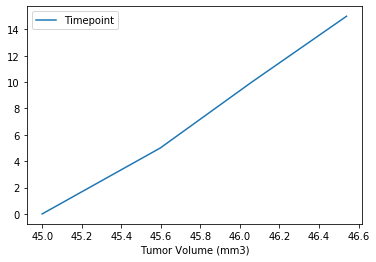

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#one_special_mouse = mouse_metadata_clean_df.loc[mouse_metadata_clean_df['Mouse ID'] == 'r157']
one_special_mouse = mouse_metadata_clean_df.loc[mouse_metadata_clean_df['Mouse ID'] == 'r157']

print(one_special_mouse[['Tumor Volume (mm3)','Timepoint']])
one_special_mouse.plot.line(x='Tumor Volume (mm3)',y='Timepoint')

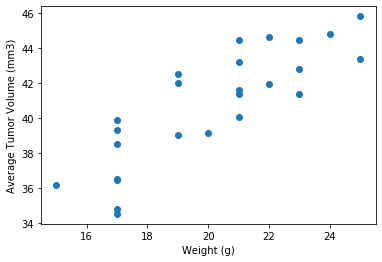

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capo_df = mouse_metadata_clean_df.loc[mouse_metadata_clean_df['Drug Regimen'] == 'Capomulin']
capavg = Capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

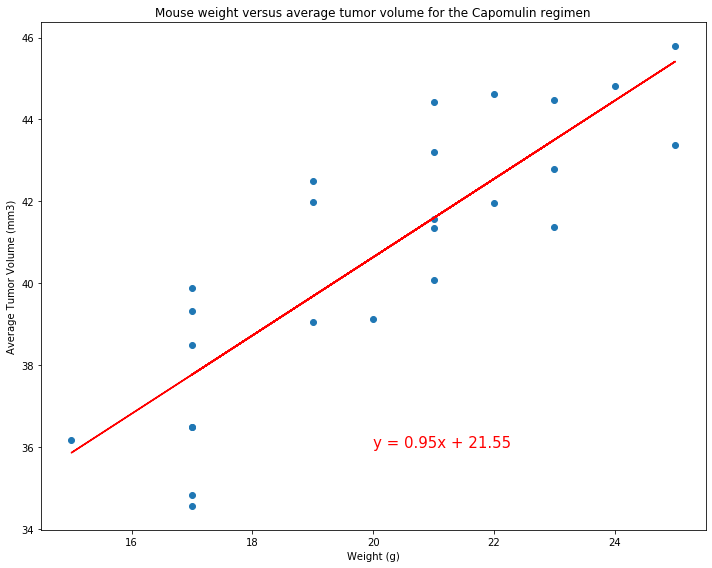

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_tumor_df = Capo_df.groupby('Mouse ID').mean()
x_values = mouse_tumor_df["Weight (g)"]
y_values = mouse_tumor_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.tight_layout()
plt.show()